In [28]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from  bnse import *
import statsmodels.api as sm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
example = 'sunspots'

if example=='hr1':
    signal = np.loadtxt('data/hr2.txt') 
    time = (np.linspace(0, 1800,1800))
    time_label = 'time'
    signal_label = 'heart-rate signal'
elif example == 'hr2':
    signal = np.loadtxt('data/hr1.txt') 
    time = (np.linspace(0, 1800,1800))
    time_label = 'time'
    signal_label = 'heart-rate signal'
elif example == 'sunspots':
    dta = sm.datasets.sunspots.load_pandas().data
    signal = np.array(dta.SUNACTIVITY)
    time = np.array(dta.YEAR)
    time_label = 'time'
    signal_label = 'sunspot data'
        
signal = signal - np.mean(signal)
indices = np.random.randint(0, len(time), size=int(len(time))) 
indices =np.sort(indices)
signal = signal[indices]
time = time[indices]
my_bse = bse(time, signal)
my_bse.set_labels(time_label, signal_label)

Negative log likelihood (before training): 1210.6502753669383


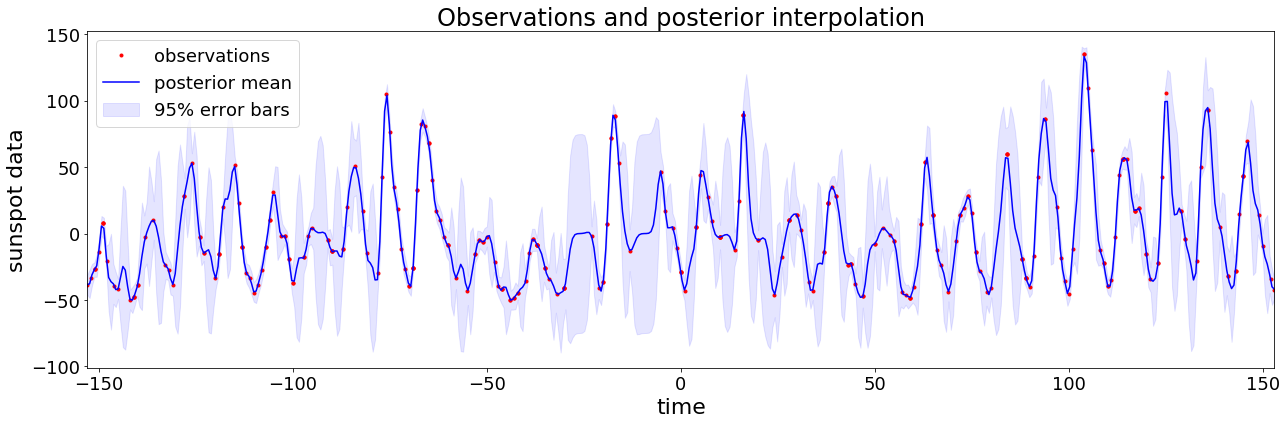

In [30]:
nll = my_bse.neg_log_likelihood()
print(f'Negative log likelihood (before training): {nll}')
my_bse.compute_moments()
my_bse.plot_time_posterior()

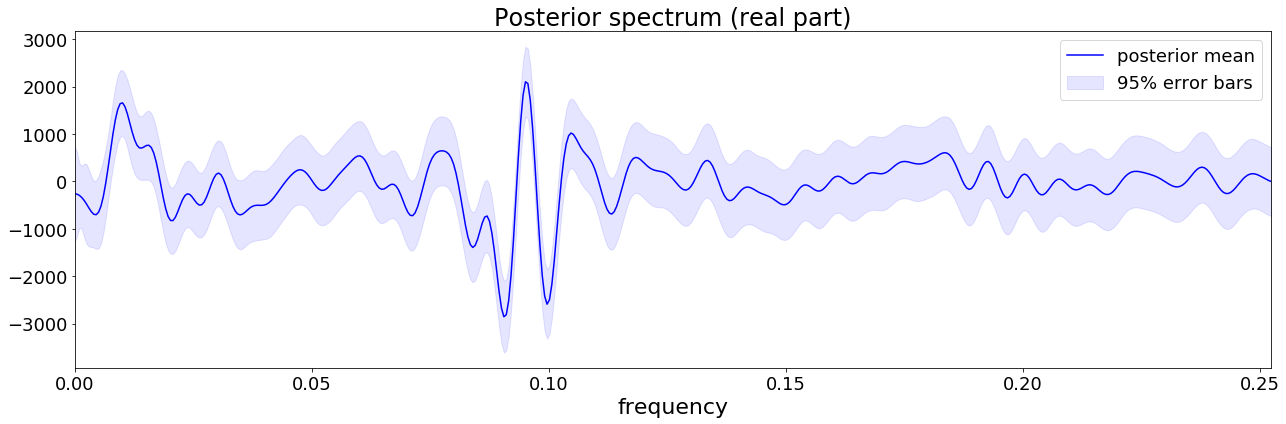

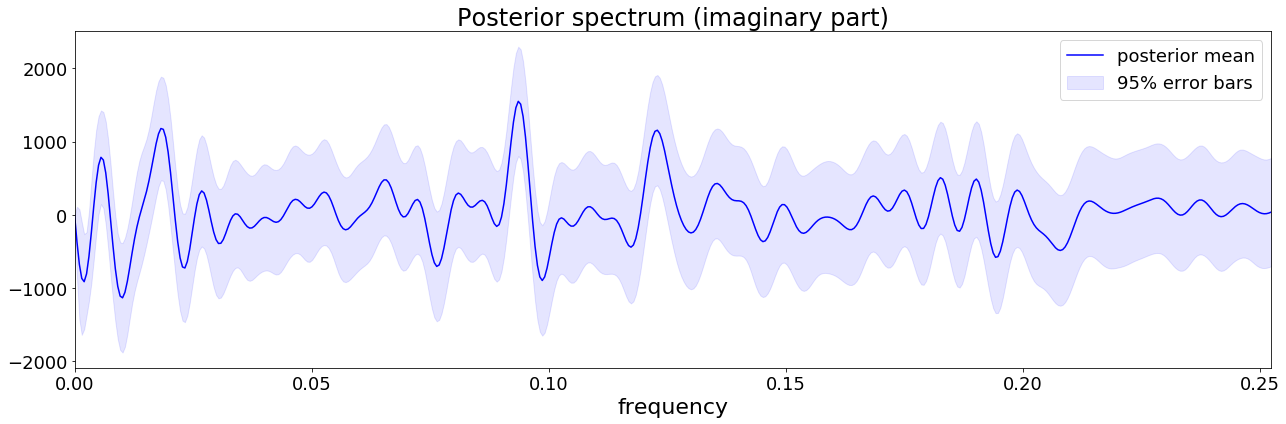

In [31]:
my_bse.plot_freq_posterior()

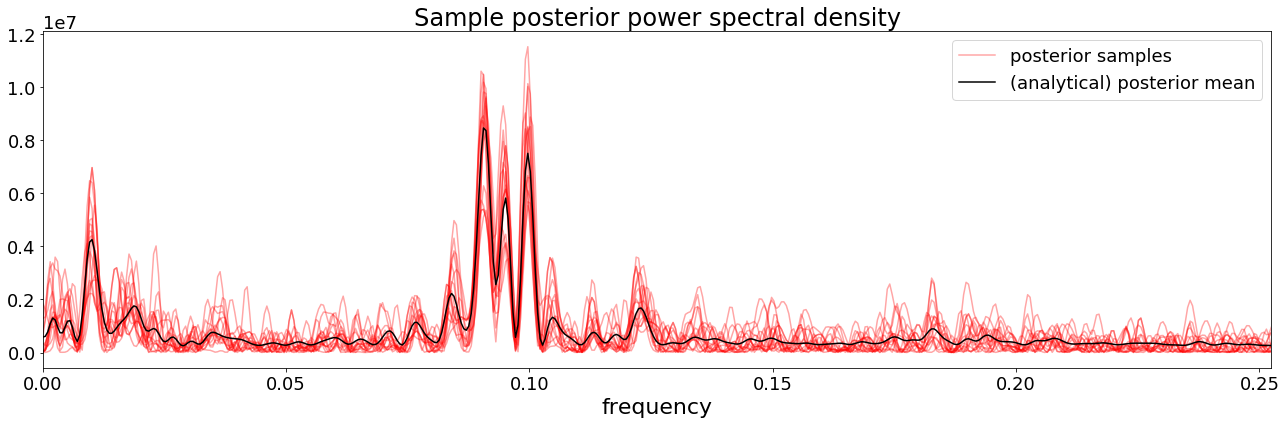

In [32]:
my_bse.plot_power_spectral_density(15)

In [33]:
my_bse.train()

Hyperparameters are:
sigma =36.58283986130448
gamma =0.27283748283622683
theta =0.0011295826711498849
sigma_n =4.813717146608933e-118


Negative log likelihood (after training): -44.15639970516179


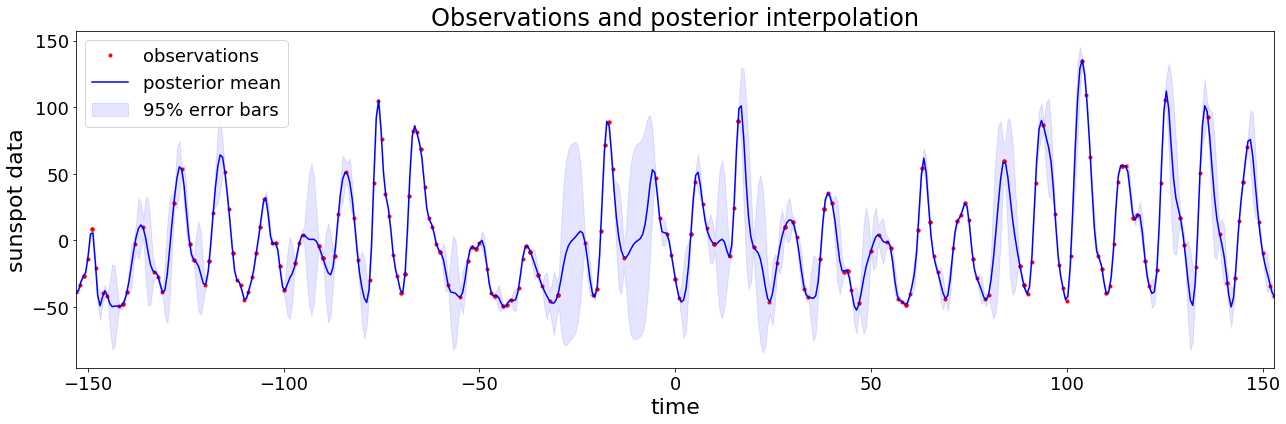

In [34]:
nll = my_bse.neg_log_likelihood()
print(f'Negative log likelihood (after training): {nll}')
my_bse.compute_moments()
my_bse.plot_time_posterior()


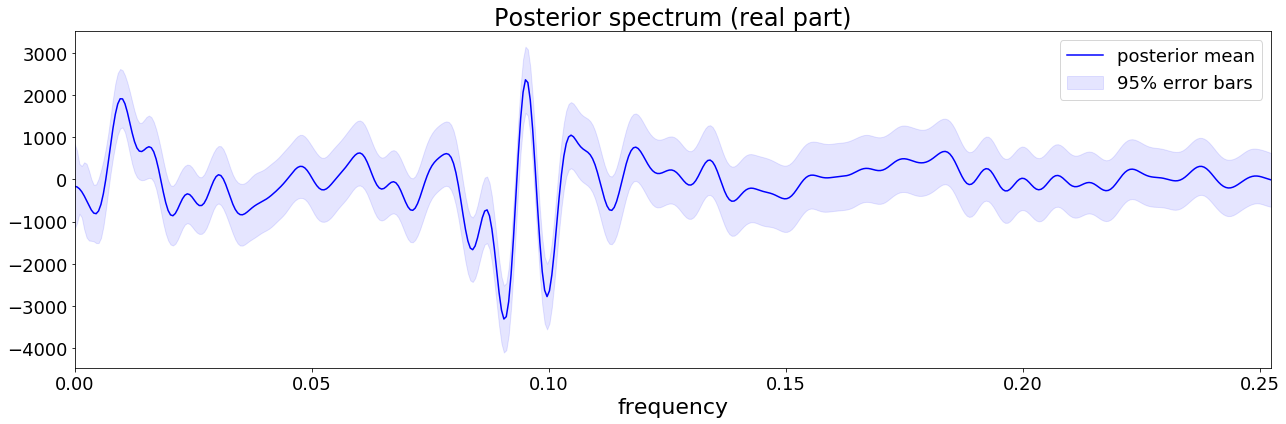

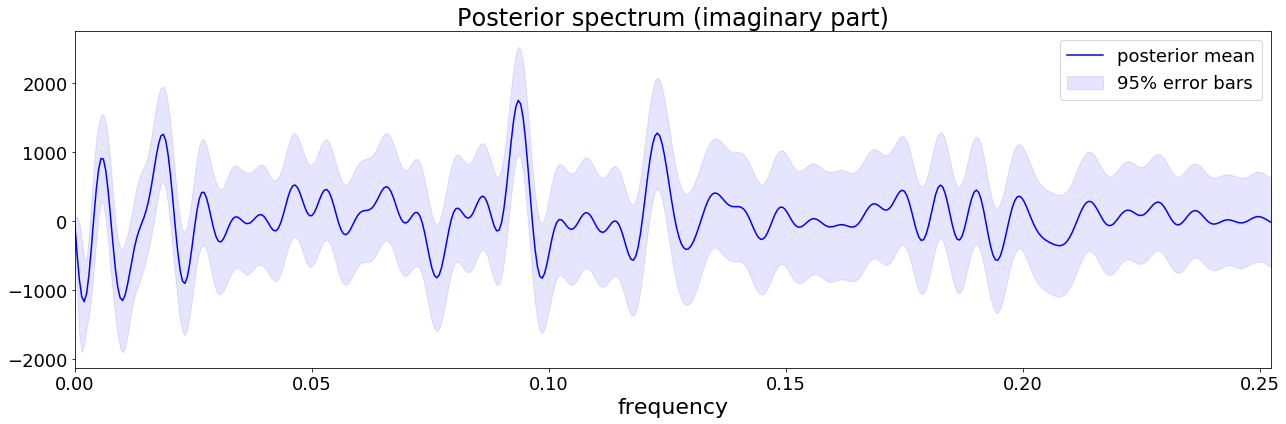

In [35]:
my_bse.plot_freq_posterior()

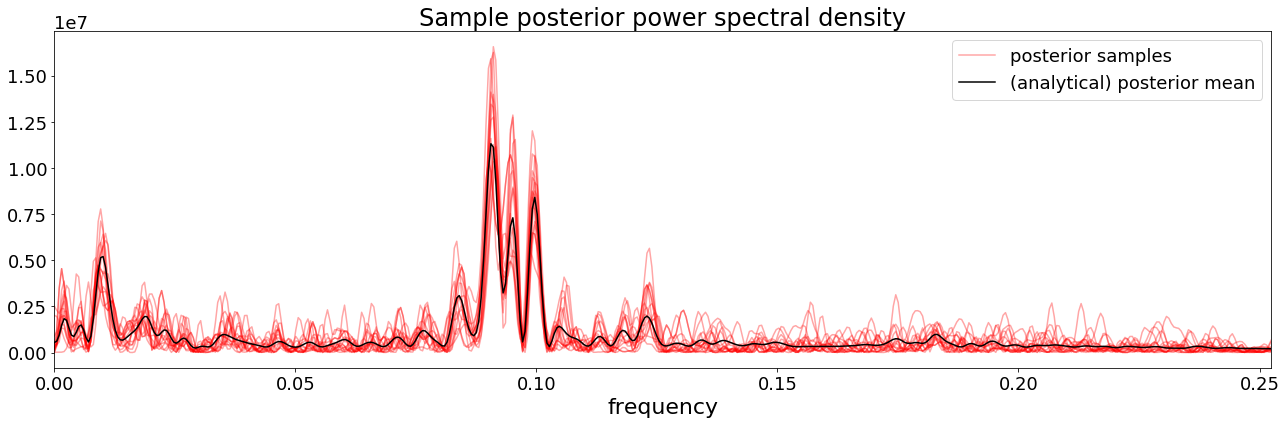

In [36]:
my_bse.plot_power_spectral_density(15)